In [1]:
#load libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.datasets as datasets
#answer 
#Q.1 Why does it makes sense to discretize columns for this problem?
#Q.2 What might be the issues (if any) if we DID NOT discretize the columns

In [2]:
#load data

df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
#look at data 
df.head(5)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [5]:
#Dataframe's shape

print(df.shape)

(48842, 11)


In [6]:
#find missing values
df.isnull().sum()
#no missing values in bins

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
#descriptive statistics
df.hours_per_week_bin.describe()

count        48842
unique           5
top       b. 31-40
freq         26639
Name: hours_per_week_bin, dtype: object

In [8]:
#Calculating number of numerical variables

int_cols = df.select_dtypes(include=['int64','float64'])

int_cols_count = int_cols.shape[1]

print(int_cols_count)

1


In [9]:
#Calculating number of categorical variables

cat_cols = df.select_dtypes(include='object')

cat_cols_count = cat_cols.shape[1]

print(cat_cols_count)

10


In [10]:
#cardinality for each of the bins
df.nunique()

hours_per_week_bin    5
occupation_bin        5
msr_bin               3
capital_gl_bin        3
race_sex_bin          3
education_num_bin     5
education_bin         5
workclass_bin         2
age_bin               5
flag                  2
y                     2
dtype: int64

In [11]:
#remove strings from bins and make a copy
df1 = df.copy()
df1.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [12]:
#use str.split to get rid of the letters before values
df1['hours_per_week_bin'] = df1['hours_per_week_bin'].astype(str).str.split(r".").str[1]
df1['occupation_bin'] = df1['occupation_bin'].astype(str).str.split(r".").str[1]
df1['msr_bin'] = df1['msr_bin'].astype(str).str.split(r".").str[1]
df1['capital_gl_bin'] = df1['capital_gl_bin'].astype(str).str.split(r".").str[1]
df1['race_sex_bin'] = df1['race_sex_bin'].astype(str).str.split(r".").str[1]
df1['education_num_bin'] = df1['education_num_bin'].astype(str).str.split(r".").str[1]
df1['education_bin'] = df1['education_bin'].astype(str).str.split(r".").str[1]
df1['workclass_bin'] = df1['workclass_bin'].astype(str).str.split(r".").str[1]
df1['age_bin']= df1['age_bin'].astype(str).str.split(r".").str[1]

In [13]:
#print copy
print(df1)

      hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0                  31-40      Mid - Low     Mid            > 0         High   
1                   0-30           High    High            = 0         High   
2                  31-40            Low     Mid            = 0         High   
3                  31-40            Low    High            = 0          Mid   
4                  31-40           High    High            = 0          Low   
...                  ...            ...     ...            ...          ...   
48837              31-40           High     Mid            = 0          Mid   
48838              31-40      Mid - Low     Low            = 0          Mid   
48839      41-50 & 61-70           High    High            = 0         High   
48840              31-40      Mid - Low     Low            > 0         High   
48841              51-60           High    High            = 0         High   

      education_num_bin education_bin workclass_bin

In [14]:
#descriptive statistics of numeric columns
df1[['hours_per_week_bin','capital_gl_bin','education_num_bin','age_bin']].describe()

,hours_per_week_bin,capital_gl_bin,education_num_bin,age_bin
count,48842,48842,48842,48842
unique,5,3,5,5
top,31-40,= 0,9-12,40-55
freq,26639,42525,30324,13963


In [15]:
#mode for each categorical column
df1[['occupation_bin','msr_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin']].mode()

,occupation_bin,msr_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin
0,Mid - Mid,High,High,9-12,Mid,income


In [18]:
df1.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [19]:
len(df1['y'])

48842

In [20]:
len(df.flag == "train")

48842

In [21]:
len(df.flag == "test")

48842

In [22]:
df1[df1["flag"] == "train"]

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,31-40,Mid - High,High,= 0,Mid,9-12,Mid,income,26-30 & 71-100,train,0
32557,31-40,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,train,1
32558,31-40,Mid - Low,Mid,= 0,Mid,9-12,Mid,income,36-40 & 56-60,train,0
32559,0-30,Mid - Low,Low,= 0,High,9-12,Mid,income,0-25,train,0


In [23]:
df1[df1["flag"] == "test"]

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25,test,0
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,test,0
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100,test,1
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55,test,1
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25,test,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,31-40,High,Mid,= 0,Mid,13,Bachelors,income,36-40 & 56-60,test,0
48838,31-40,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,31-35 & 61-70,test,0
48839,41-50 & 61-70,High,High,= 0,High,13,Bachelors,income,36-40 & 56-60,test,0
48840,31-40,Mid - Low,Low,> 0,High,13,Bachelors,income,40-55,test,0


In [24]:
#part 3
#make testing and training data
train = df1[df1["flag"]=="train"]
test = df1[df1["flag"]=="test"]

In [25]:
train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [26]:
test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25,test,0
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,test,0
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100,test,1
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55,test,1
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25,test,0


In [27]:
len(train)

32561

In [28]:
len(test)

16281

In [29]:
test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25,test,0
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,test,0
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100,test,1
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55,test,1
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25,test,0


In [30]:
#extract train Y and Train X
#for testing put all feature columns into test x dataframe
#outcome into y dataframe
#4 data frames
#how to train it?
#drop y because that is the outcome
#to create train X drop the flag column
X_train = train.drop(['flag','y'],axis=1)
X_train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100


In [31]:
len(X_train)

32561

In [32]:
#prepare train y  (train y is the outcomes) #one column dataframe, you only keep the one column because you want to see the results here
#extracted y from the whole thing 
y_train = train['y']


In [33]:
len(y_train)

32561

In [34]:
#prepare X test 
X_test = test.drop(['flag','y'],axis=1)
X_test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25


In [35]:
#prepare Y test
Y_test = test['y']
Y_test.head()

32561    0
32562    0
32563    1
32564    1
32565    0
Name: y, dtype: int64

In [36]:
X_test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25


In [37]:
#now you can do one-hot encoding of X test and X train, because X has categorical features

#do one hot encoding for categorical variables

X_test = pd.get_dummies(X_test, columns=['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin'])

#see dataframe now after one hot encoding
X_test.head()

,hours_per_week_bin_ 0-30,hours_per_week_bin_ 31-40,hours_per_week_bin_ 41-50 & 61-70,hours_per_week_bin_ 51-60,hours_per_week_bin_ 71-100,occupation_bin_ High,occupation_bin_ Low,occupation_bin_ Mid - High,occupation_bin_ Mid - Low,occupation_bin_ Mid - Mid,...,education_bin_ Low,education_bin_ Masters,education_bin_ Mid,workclass_bin_ income,workclass_bin_ no income,age_bin_ 0-25,age_bin_ 26-30 & 71-100,age_bin_ 31-35 & 61-70,age_bin_ 36-40 & 56-60,age_bin_ 40-55
32561,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
32562,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
32563,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
32564,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
32565,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0


In [38]:
#repeat process for X TRAIN
X_train = pd.get_dummies(X_train, columns=['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin'])
X_train.head()

,hours_per_week_bin_ 0-30,hours_per_week_bin_ 31-40,hours_per_week_bin_ 41-50 & 61-70,hours_per_week_bin_ 51-60,hours_per_week_bin_ 71-100,occupation_bin_ High,occupation_bin_ Low,occupation_bin_ Mid - High,occupation_bin_ Mid - Low,occupation_bin_ Mid - Mid,...,education_bin_ Low,education_bin_ Masters,education_bin_ Mid,workclass_bin_ income,workclass_bin_ no income,age_bin_ 0-25,age_bin_ 26-30 & 71-100,age_bin_ 31-35 & 61-70,age_bin_ 36-40 & 56-60,age_bin_ 40-55
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [39]:
#now you have X train and y train ready, X test and Y Test ready you can use the classifier algorithm that you would like to use to model the data. 

In [40]:
#use decision tree classifier
#max depth is how many nodes you want to go to?
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features=None, min_samples_leaf=15)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

In [ ]:
# CALCULATE THE PERFORMANCE BY COMPARING "Predicted Y" against "y_TEST"

In [ ]:
#part 4 evaluate decision tree performance

In [57]:
# CALCULATE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [58]:
df_table = confusion_matrix(Y_test, y_pred)
print (df_table)

[[11538   897]
 [ 1656  2190]]


In [67]:
#print accuracy of the model
#In multilabel classification, this function computes subset accuracy

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy score is just percentage of correct predictions - this is how you calculate the 4 
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall_score = recall_score(Y_test, y_pred)
f1_score = f1_score(Y_test, y_pred, average ='binary')

print("This is the accuracy score:", (accuracy*100).round(2))
print("This is the precision score:", (precision*100).round(2))
print("This is the recall score:", (recall_score*100).round(2))
print("This is the f1_score:", (f1_score*100).round(2))

This is the accuracy score: 81.66
This is the precision score: 69.55
This is the recall score: 39.78
This is the f1_score: 50.61


In [ ]:
#5 fine tune decision perfomance
#Split Criteria – ‘Entropy’ or ‘Gini Impurity’
#Maximum Features – The number of features to consider when looking for the best split. If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
#Minimum Sample Leaf – Minimum of samples in a leaf node to stop further splitting  (becomes a leaf node)
#Maximum Depth – Maximum depth of the tree allowed

In [ ]:
#hyperparameter - split criteria
#what am I supposed to put here 

In [ ]:
#maximum features find the best parameters
max_features_accuracy_results =[]
max_features_precision_results = []
max_features_recall_score_results = []
max_featuresf1_score_results = []


max_features_options = ['auto', 'None', 0.3,0.4,0.5,0.6,0.7,0.8]

for trees in max_features_options:
  model  =DecisionTreeClassifier(max_features=trees, random_state=101)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall_score = recall_score(Y_test, y_pred)
  f1_score = f1_score(Y_test, y_pred, average ='binary')
  max_features_accuracy_results.append(accuracy)
  max_features_precision_results.append(precision)
  max_features_recall_score_results.append(recall_score)
  max_featuresf1_score_results.append(f1_score)

In [120]:
#minimum sample leaf
min_sample_leaf_accuracy_results =[]
min_sample_leaf_precision_results = []
min_sample_leaf_recall_score_results = []
min_sample_leaf_score_results = []


max_features_options = [5,10,15,20,25,30,35,40]

for trees in max_features_options:
  model  =DecisionTreeClassifier(min_sample_leaf=trees, random_state=101)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall_score = recall_score(Y_test, y_pred)
  f1_score = f1_score(Y_test, y_pred, average ='binary')
min_sample_leaf_accuracy_results.append(accuracy)
min_sample_leaf_precision_results.append(precision)
min_sample_leaf_recall_score_results.append(recall_score)
min_sample_leaf_score_results.append(f1_score)

TypeError: ignored

In [90]:
#maximum depth
max_depth_accuracy_results =[]
max_depth_precision_results = []
max_depth_recall_score_results = []
f1_score_results = []


max_depth_options = [2,4,6,8,10,12,14,18,20]
for trees in max_depth_options:
  model  =DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall_score = recall_score(Y_test, y_pred)
  f1_score = f1_score(Y_test, y_pred, average ='binary')
  max_depth_accuracy_results.append(accuracy)
  max_depth_precision_results.append(precision)
  max_depth_recall_score_results.append(recall_score)
  f1_score_results.append(f1_score)


  #was not able to use recall score or f1 score

TypeError: ignored

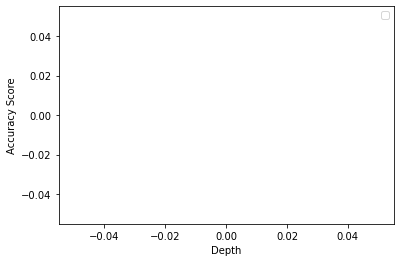

In [91]:
plt.plot(max_depth_accuracy_results)
plt.plot(max_depth_precision_results)
plt.plot(max_depth_recall_score_results)
plt.plot(f1_score_results)
plt.ylabel("Accuracy Score")
plt.xlabel("Depth")
plt.legend()

#the code above is not letting the recall score and f1_score to be used to see what depth is be based on the different 

In [93]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

accuracy_score(Y_test,y_pred) # accuracy score

# Printing classifier report after prediction
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.70      0.40      0.51      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.67      0.70     16281
weighted avg       0.80      0.82      0.80     16281



In [96]:
# CALCULATE and PRINT AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

0.7387378800338986


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


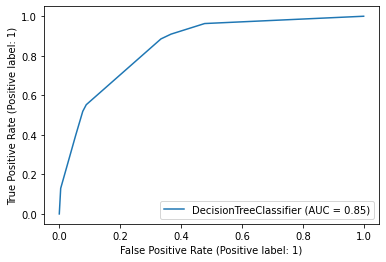

In [119]:
#print roc score 
test_auc = roc_auc_score(Y_test, y_pred)
#ROC AUC Curve
plot_roc_curve(t, X_test, Y_test)

print(test_auc)

In [98]:
# ALGORITHM: DECISION TREE
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=None)
t = t.fit(X_train, y_train)
y_pred=t.predict(X_test)

In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version
import sklearn
print(sklearn.__version__)

1.0.2


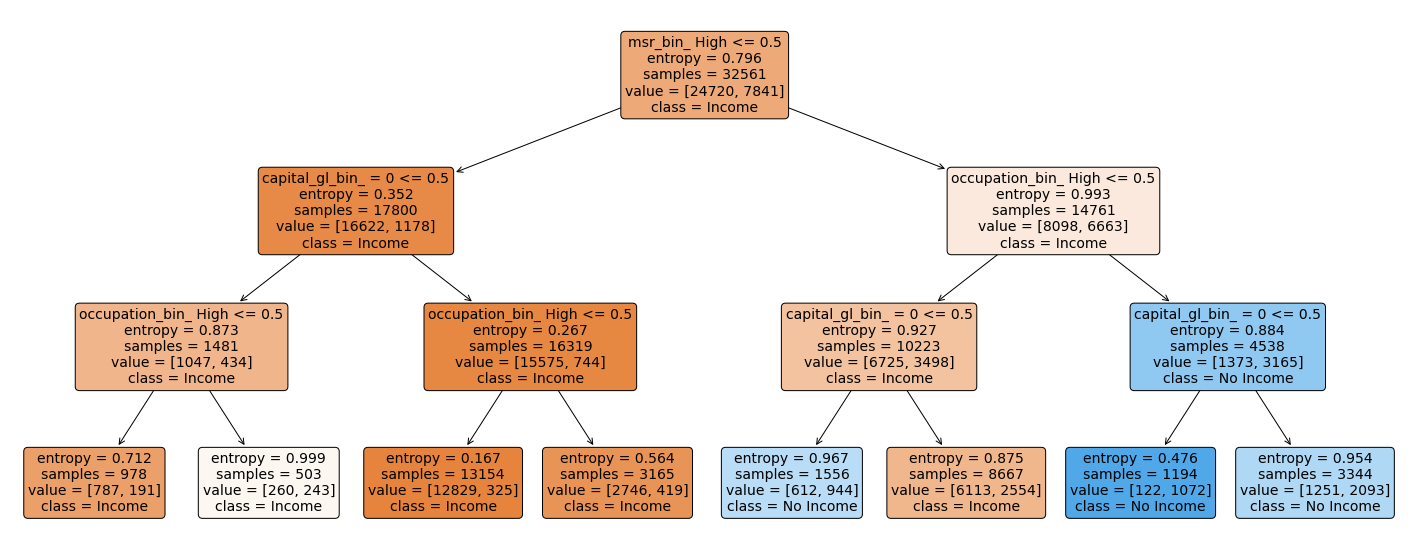

In [102]:
plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(X_train), class_names=['Income','No Income'], 
              filled=True, rounded=True, fontsize=14)

In [ ]:
#7 Conclusion
#Q.1 Why does it makes sense to discretize columns for this problem?
#easier to do one hot encoding to be able to process the data in the model
#Q.2 What might be the issues (if any) if we DID NOT discretize the columns.
#issuesmore complex to encode the data
#Q.3 Decision Tree Hyper-parameter variation vs. performance
#could not get the the measures for f1 score and recall score to work so I could not find the best tree
#4 How long was your total run time to train the best model? 
#Q.5 Did you find the BEST TREE? 
#Q.6 Write your observations from the visualization of the best tree
#used the code from the titanic data and decided to ask 
#Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”
#Q.8 What is the probability that your prediction for this person is correct?

In [121]:
#8 - trying to create a new df to see if it predicts well
predict = {'Hours Worked per Week': [48],
        'Occupation Category': ['Mid - Low'],
        'Marriage Status & Relationships': ['High'],
        'Capital Gain': ['Yes'],
        'Race-Sex Group': ['Mid'],
        'Number of Years of Education': [12],
        'Education Category': ['High'],
        'Work Class': ['Income'],
        'Age': [58]}

pred_df = pd.DataFrame(predict)
#need to bin
#one hot encode
#then predict
pred_dfenc = .pd.get_dummies(pred_df, columns=[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin'])